In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib import ticker
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter
import pickle

In [2]:
def format_func(value, tick_number):
    # Convert the value to HH:MM format
    hour = int(value)
    return f"{hour:02d}:00"

In [3]:
with open('fig16.pickle', 'rb') as f:
    loaded_object = pickle.load(f)

In [4]:
lhour3,lst_obs,rurmean_obs,lst_ifs,rurmean_ifs,lst_ifs_c2,rurmean_ifs_c2,uhi_obs,uhi_ifs,uhi_ifs_c2,coords,city=loaded_object[:]

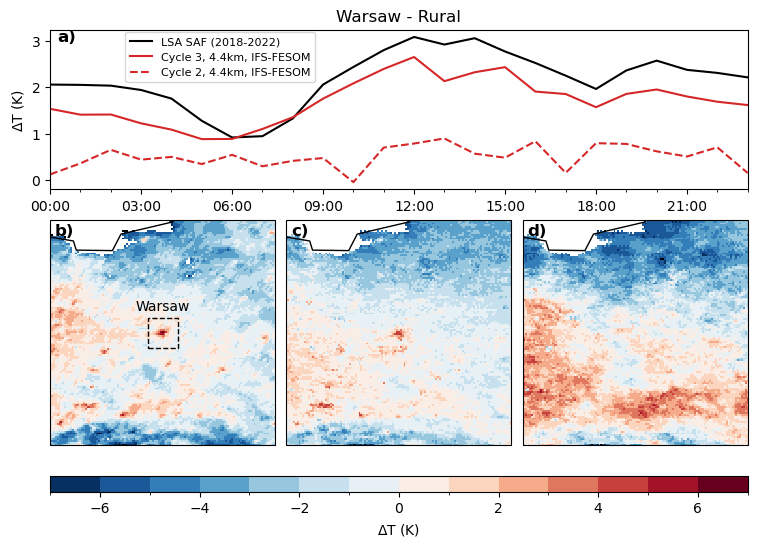

In [5]:
t=14
extension=3
sstep=1
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(3, 3,height_ratios=[0.5, 1, 0.05],wspace=0.05, hspace=-0.1)

ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())

[ax.coastlines(resolution='110m', color='k') for ax in [ax1,ax2,ax3]]

ax0.plot(sorted(lhour3) ,uhi_obs.sortby(lhour3),label='LSA SAF (2018-2022)',c='k')
ax0.plot(sorted(lhour3) ,uhi_ifs.sortby(lhour3),label='Cycle 3, 4.4km, IFS-FESOM',c='C3' )
ax0.plot(sorted(lhour3) ,uhi_ifs_c2.sortby(lhour3),label='Cycle 2, 4.4km, IFS-FESOM',c='C3',ls='--')

cmap=cm.RdBu_r
bounds = np.arange(-7,7.1,1)
cmap.set_under('black')
cmap.set_over('black')
norm = colors.BoundaryNorm(bounds, cmap.N)
sc1=ax1.pcolormesh(lst_obs.lon[::sstep], lst_obs.lat[::sstep], lst_obs.isel(time=t)[::sstep]-rurmean_obs.isel(time=t),cmap=cmap, transform=ccrs.PlateCarree(), norm=norm)
sc2=ax2.pcolormesh(lst_ifs.lon[::sstep], lst_ifs.lat[::sstep], lst_ifs.isel(time=t)[::sstep]-rurmean_ifs.isel(time=t),cmap=cmap, transform=ccrs.PlateCarree(), norm=norm)
sc3=ax3.pcolormesh(lst_ifs_c2.lon[::sstep], lst_ifs_c2.lat[::sstep], lst_ifs_c2.isel(time=t)[::sstep]-rurmean_ifs_c2.isel(time=t),cmap=cmap, transform=ccrs.PlateCarree(), norm=norm)

cax = fig.add_subplot(gs[2,:])
cbar = fig.colorbar(sc1, cax=cax,orientation='horizontal')

[ax.set_extent([coords[1]-extension,coords[1]+extension,coords[0]-extension,coords[0]+extension]) for ax in [ax1,ax2,ax3]]

#ax0.set_xlabel('Local Time',labelpad=-0.1)
ax0.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax0.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax0.xaxis.set_major_formatter(FuncFormatter(format_func))
ax0.set_xlim(0,23)


ax0.set_ylabel(r'$\Delta$T (K)')
ax0.legend(loc='upper left', bbox_to_anchor=(0.10,1.02),fontsize=8)
ax0.set_title(city+' - Rural')

rect = Rectangle((coords[1] - 0.4, coords[0] - 0.4), 0.8, 0.8, fill=False, edgecolor='black', linewidth=1,ls='--')
ax1.add_patch(rect)

# Annotate 'city' above the black square
ax1.annotate('Warsaw', xy=(coords[1], coords[0] + 0.7), xytext=(coords[1], coords[0] + 0.7),xycoords='data',
            #arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='center')

letters='bcd'
ax0.annotate('a)', xy=(0.01, 0.93), xycoords='axes fraction',fontsize=12, fontweight='bold', color='black') 
[ax.annotate(letters[i]+')', xy=(0.02, 0.93), xycoords='axes fraction',fontsize=12, fontweight='bold', color='black') for i,ax in enumerate([ax1,ax2,ax3])]
cbar.set_label(r'$\Delta$T (K)')
#plt.savefig('/home/b/b381679/postproc/uhi/uhi_figs/LST/'+city+'_lst_complete.png')